<a href="https://colab.research.google.com/github/YogeshRajgure/iNeuron_Assignments/blob/main/Assignment25_TimeSeriesProject_YR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pick up the following stocks and generate forecasts accordingly.\
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [36]:
data_path = '/content/drive/MyDrive/Colab Notebooks/data/data_stocks.csv'

In [37]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df = pd.read_csv(data_path)

In [39]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,164.630,888.5500,49.850,219.11,39.43,274.080,31.780,81.03,124.89,58.820,77.725,330.73,72.430,37.470,119.385,167.740,33.7400,46.6450,126.8600,59.720,83.5400,29.020,28.370,63.4900,78.4600,89.90,33.3975,400.9400,...,18.6100,19.8901,70.69,36.26,124.66,164.62,47.0400,106.27,107.65,124.5901,51.6200,112.36,89.35,91.130,55.21,66.5900,120.1300,100.35,65.07,48.730,156.390,60.46,55.70,171.83,73.08,29.62,72.1000,52.160,20.34,34.00,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,164.680,887.1173,49.940,219.98,39.68,273.990,31.780,81.21,124.99,58.495,77.940,330.73,72.040,37.540,118.810,167.776,33.8800,46.6100,126.8600,59.830,83.9400,29.140,28.400,63.4600,78.6200,89.73,33.3950,400.4000,...,18.5100,19.8901,70.77,36.26,124.82,164.39,47.0400,106.27,107.65,124.5901,51.5800,112.36,89.35,91.210,55.12,66.3550,120.1300,100.03,65.04,48.752,157.190,59.93,55.81,171.54,72.95,29.64,72.1800,52.245,20.32,34.07,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,164.905,887.5110,49.860,219.39,39.60,274.275,31.765,81.21,125.00,58.470,77.815,330.73,72.055,37.610,118.830,168.000,33.9000,46.8850,126.9576,59.905,83.9400,29.150,28.375,63.5250,78.6311,89.24,33.4100,401.9850,...,18.4397,19.7900,70.62,36.19,124.82,165.30,46.9800,106.38,107.31,124.7100,51.4600,112.13,89.16,91.080,55.09,66.2417,120.3368,100.39,65.08,48.720,157.070,60.08,55.64,171.55,72.98,29.67,72.3192,52.200,20.26,34.11,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,164.760,886.2700,49.915,219.30,39.57,273.590,31.830,81.13,124.73,58.420,77.950,330.73,72.140,37.620,118.680,168.200,33.8499,46.7000,126.7000,59.700,83.7064,29.125,28.350,63.5300,78.7060,89.17,33.3350,401.5000,...,18.3700,19.7875,70.62,36.00,124.82,165.16,46.8097,106.33,107.49,124.4889,51.3800,112.01,89.06,91.015,55.21,66.1700,120.3100,100.39,64.95,48.695,156.945,60.39,55.64,171.26,73.09,29.79,72.4300,52.140,20.20,33.97,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,164.850,886.5800,49.915,219.18,39.55,273.540,31.830,81.12,124.83,58.600,78.050,330.73,72.215,37.625,118.935,168.040,33.8400,46.8562,126.8900,59.500,84.0000,29.140,28.410,63.6344,78.5850,88.95,33.4000,399.7704,...,18.3850,19.7324,70.78,36.01,124.82,165.24,47.0200,106.56,107.48,125.2449,51.4347,112.23,89.10,91.000,55.32,66.1800,120.3600,100.11,64.84,48.630,157.160,60.18,55.68,171.18,72.99,29.71,72.4800,52.140,20.22,34.00,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [40]:
df['DATE'] = pd.to_datetime(df['DATE'], unit='s')

In [41]:
df['DATE'].tail()

41261   2017-08-31 19:56:00
41262   2017-08-31 19:57:00
41263   2017-08-31 19:58:00
41264   2017-08-31 19:59:00
41265   2017-08-31 20:00:00
Name: DATE, dtype: datetime64[ns]

In [44]:
df.index = df['DATE']

In [45]:
df.drop(columns=['DATE'], inplace = True)

In [46]:
df.tail()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,...,NYSE.UA,NYSE.UAA,NYSE.UAL,NYSE.UDR,NYSE.UHS,NYSE.UNH,NYSE.UNM,NYSE.UNP,NYSE.UPS,NYSE.URI,NYSE.USB,NYSE.UTX,NYSE.V,NYSE.VAR,NYSE.VFC,NYSE.VLO,NYSE.VMC,NYSE.VNO,NYSE.VTR,NYSE.VZ,NYSE.WAT,NYSE.WEC,NYSE.WFC,NYSE.WHR,NYSE.WM,NYSE.WMB,NYSE.WMT,NYSE.WRK,NYSE.WU,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-31 19:56:00,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,45.130,12.985,177.8512,979.840,65.580,251.915,29.3,316.20,33.20,100.89,138.7353,67.72,70.680,398.23,76.925,40.6507,125.91,156.80,32.185,50.185,134.98,70.820,78.21,22.210,21.025,57.270,79.65,121.40,36.135,468.24,62.875,...,15.105,16.140,61.98,38.7850,108.25,199.335,48.205,105.33,114.340,117.98,51.225,119.7900,103.7100,106.16,62.885,68.125,121.250,74.540,68.36,47.99,183.410,65.220,51.060,171.64,77.13,29.745,78.105,56.905,18.910,32.650,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
2017-08-31 19:57:00,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,45.130,12.985,177.7800,980.010,65.590,252.120,29.3,316.58,33.21,100.88,138.7799,67.73,70.640,398.24,76.940,40.6250,125.89,156.82,32.200,50.190,135.08,70.860,78.21,22.200,21.030,57.290,79.63,121.37,36.130,468.19,62.895,...,15.105,16.135,61.99,38.7899,108.19,199.240,48.205,105.32,114.350,118.00,51.235,119.8056,103.6750,106.20,62.930,68.110,121.295,74.515,68.34,47.99,183.445,65.240,51.070,171.65,77.13,29.770,78.095,56.920,18.920,32.640,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
2017-08-31 19:58:00,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,45.135,12.970,177.7600,979.810,65.540,252.010,29.3,316.32,33.19,100.86,138.8600,67.72,70.640,398.33,76.910,40.6300,125.85,156.80,32.200,50.190,134.98,70.850,78.22,22.195,21.025,57.280,79.63,121.33,36.130,468.12,62.860,...,15.100,16.135,61.97,38.7950,108.15,199.070,48.195,105.29,114.295,118.00,51.235,119.7700,103.6000,106.23,62.870,68.095,121.260,74.440,68.34,47.98,183.350,65.225,51.060,171.67,77.11,29.750,78.100,56.905,18.915,32.620,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
2017-08-31 19:59:00,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,45.065,12.965,177.6300,979.445,65.445,251.760,29.3,316.37,33.16,100.83,138.7350,67.71,70.585,397.98,76.820,40.6000,125.78,156.73,32.195,50.155,134.90,70.795,78.20,22.200,21.000,57.280,79.56,121.24,36.120,467.93,62.800,...,15.100,16.125,61.91,38.7950,108.10,198.810,48.165,105.17,114.200,117.89,51.235,119.6900,103.5302,106.14,62.850,68.095,121.240,74.410,68.32,47.94,183.280,65.205,51.025,171.56,77.06,29.725,78.065,56.860,18.915,32.595,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
2017-08-31 20:00:00,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,45.120,13.000,177.8200,980.600,65.560,252.070,29.3,316.58,33.18,100.89,138.9850,67.78,70.635,398.54,76.840,40.6100,125.80,156.74,32.225,50.200,135.01,70.770,78.21,22.210,21.010,57.305,79.64,121.50,36.130,468.41,62.820,...,15.100,16.140,61.95,38.8000,108.10,198.900,48.190,105.26,114.320,118.03,51.250,119.7000,103.5300,106.17,62.860,68.100,121.270,74.450,68.38,47.97,183.410,65.230,51.070,171.60,77.08,29.740,78.070,56.900,18.930,32.610,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [47]:
df_AAPL = df[['NASDAQ.AAPL']].copy()

In [59]:
df_AAPL.shape

(41266, 1)

In [49]:
df_AAPL.count()

NASDAQ.AAPL    41266
dtype: int64

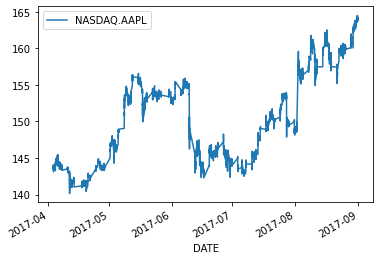

In [50]:
df_AAPL.plot()
plt.show()

Stationary means mean, variance and covariance is constant over periods.

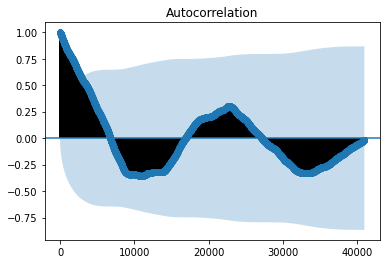

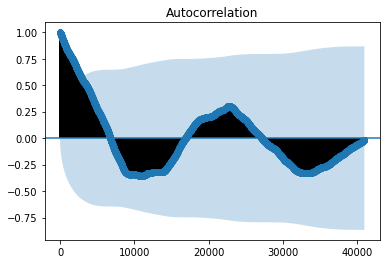

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_AAPL, lags=41000)

## **Converting series to stationary**

In [61]:
df_AAPL.shift(1)

,NASDAQ.AAPL
DATE,
2017-04-03 13:30:00,NaN
2017-04-03 13:31:00,143.6800
2017-04-03 13:32:00,143.7000
2017-04-03 13:33:00,143.6901
2017-04-03 13:34:00,143.6400
...,...
2017-08-31 19:56:00,164.1400
2017-08-31 19:57:00,164.1100
2017-08-31 19:58:00,164.1200


In [62]:
X = df_AAPL.values
train = X[0 : 28886] # 27 data as train data
test = X[28886 : ] # 9 data as test data

print(train.size)
print(test.size)
predictions = []

28886
12380


# **ARIMA model**

In [63]:
from statsmodels.tsa.arima_model import ARIMA

In [64]:
import itertools
p = d = q = range(0,6)
pdq = list(itertools.product(p,d,q))

In [65]:
import warnings

warnings.filterwarnings('ignore')

for param in pdq:
  try:
    model_arima = ARIMA(train, order=param)
    model_arima_fit = model_arima.fit()
    print(param, model_arima_fit.aic)
  except:
    continue

(0, 0, 0) 170326.9720446082
(0, 0, 1) 131018.0359986521
(0, 0, 2) 95780.67244459415
(0, 1, 0) -64708.71200636144
(0, 1, 1) -64706.87731534093
(0, 1, 2) -64718.286096672164
(0, 1, 3) -64719.67999909342
(0, 1, 4) -64724.74650243412
(0, 1, 5) -64723.2739575701
(0, 2, 0) -44617.132207470175
(0, 2, 1) -64678.28215908086
(1, 0, 0) -64703.10601169593
(1, 0, 1) -64701.259968147904
(1, 0, 2) -64712.56738206328
(1, 0, 3) -64714.01381733059
(1, 0, 4) -64719.00741069441
(1, 0, 5) -64717.516473438096
(1, 1, 0) -64706.87029558887
(1, 1, 1) -64714.63157427787
(1, 1, 2) -64725.38695947973
(1, 2, 0) -52566.600243591165
(1, 2, 1) -64686.659551363045
(1, 2, 2) -64694.12985307143
(1, 2, 3) -64695.04972248302
(1, 2, 4) -64699.2975861302
(1, 2, 5) -64699.320829233286
(2, 0, 0) -64701.25345369373
(2, 0, 1) -64709.05735839403
(2, 0, 2) -64719.70639336604
(2, 0, 3) -64717.71697902825
(2, 0, 4) -64716.79946561204
(2, 0, 5) -64715.502681032
(2, 1, 0) -64717.93086809867
(2, 1, 1) -64725.40319961721
(2, 2, 0) -563

In [66]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(train, order=(4,1,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-64744.94385837171


In [67]:
predictions = model_arima_fit.forecast(steps=12380)[0]
predictions

array([150.61361413, 150.61507159, 150.61484591, ..., 153.58384484,
       153.58408475, 153.58432466])

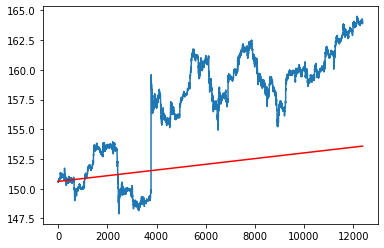

In [68]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

37.55273431612137

The above forecasting done for NASDAQ.AAPL. Similar can be done for other stocks.